William Lee / BMI-2005 / Homework 3

In [ ]:
# 1)
"""
(Note: // # // denotes a mistake in the BST)
REASONING:
    
sequence C: 925, 202, 911, 240, 912, 245, 363

925 --LEFT--> 202 --RIGHT--> 911 --LEFT--> 240 --RIGHT--> // 912 // ...
... --LEFT--> 245 --RIGHT--> 363

912 is in 911's left subtree, which is not possible (all nodes in a given
node's left subtree must have smaller keys than that node).

sequence E: 935, 278, 347, 621, 299, 392, 358, 363

935 --LEFT--> 278 --RIGHT--> 347 --RIGHT--> 621 --LEFT--> // 299 // ...
... --RIGHT--> 392 --LEFT--> 358 --RIGHT--> 363

299 is in 347's right subtree, which is not possible (all nodes in a given
node's right subtree must have larger keys than that node).

SOLUTION: Neither C nor E could be the sequence of nodes examined.
"""

In [ ]:
# 2a)
"""
We can utilize a BST here. Each node's key and value will be, respectively, a
hash value ("h(k)") and its corresponding key ("k") from the linked list. When
searching for an element with a given key, we can simply move through the tree
and see whether the current node's hash value is greater than or less than the
the hash value of the desired element - this will determine which direction
(left or right, respectively) we will look to next. When the hash values match,
we can use that node's value - i.e, the key (long character string) from the
linked list - to retrieve the desired element.
"""

In [2]:
# 2b)
# h(k) = floor(m (kA mod 1))
# A = ((sqrt(5) - 1)/2)
# keys = {61, 62, 63, 64, 65}

# import "math" package for floor() and sqrt() functions
import math

# computing the hashes:
A = (math.sqrt(5) - 1)/2

# key = 61
print("key = 61 | hash =", math.floor(1000*(61*A%1)))

# key = 62
print("key = 62 | hash =", math.floor(1000*(62*A%1)))

# key = 63
print("key = 63 | hash =", math.floor(1000*(63*A%1)))

# key = 64
print("key = 64 | hash =", math.floor(1000*(64*A%1)))

# key = 65
print("key = 65 | hash =", math.floor(1000*(65*A%1)))

key = 61 | hash = 700
key = 62 | hash = 318
key = 63 | hash = 936
key = 64 | hash = 554
key = 65 | hash = 172


In [3]:
# 2c)
"""
P_n,m(no_collision) =  m! / ((m-n)! * m^n)
P_n,m(collision) = 1 - P_n,m(no_collision)
"""

m = 100
n = 2

# P_n,m(no_collision)
p_no_col = math.factorial(m)/(math.factorial(m-n)*(m**n))
print("P(keys hash to different values) =", p_no_col)

# P_n,m(collision)
p_col = round(1 - p_no_col, 2)
print("P(keys hash to the same value) =", p_col)

P(keys hash to different values) = 0.99
P(keys hash to the same value) = 0.01


In [ ]:
# 3a)
"""
WORK:
1) 1 --RIGHT--> 2 --RIGHT--> 3
2) 1 --RIGHT--> 3 --LEFT--> 2
3) 2 --LEFT--> 1 --RIGHT--> 3
4) 3 --LEFT--> 2 --LEFT--> 1
5) 3 --LEFT--> 1 --RIGHT--> 2

SOLUTION: There are five valid BSTs that can be drawn from the array [1, 2, 3]
"""

In [4]:
# 3b.i)
def cn_recursive(n):
    if n == 0:
        return 1
    else:
        nth_cat_num = 0
        for i in range(n):
            nth_cat_num += cn_recursive(i)*cn_recursive(n-1-i)
        return nth_cat_num

In [5]:
# 3b.ii)
def cn_fast(n):
    bi_co = math.factorial(2*n)/(math.factorial(n)*math.factorial(2*n-n))
    return int((1/(n+1))*bi_co)

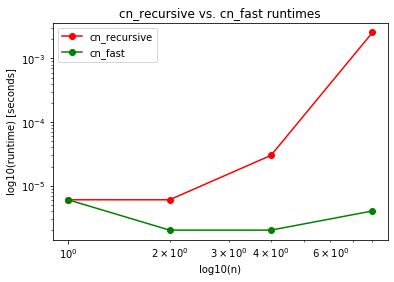

n = 0 | Catalan number = 1
n = 1 | Catalan number = 1
n = 2 | Catalan number = 2
n = 3 | Catalan number = 5
n = 4 | Catalan number = 14
n = 5 | Catalan number = 42
n = 6 | Catalan number = 132
n = 7 | Catalan number = 429
n = 8 | Catalan number = 1430


In [6]:
# 3b.iii)
import time
import matplotlib.pyplot as plt

def get_cn_time(n, cn_func):
    begin = time.process_time()
    cn_func(n)
    finish = time.process_time()
    return (finish - begin)

doub = [1,2,4,8]

rcsv_time = []
fast_time = []

for val in doub:
    rcsv_time.append(get_cn_time(val, cn_recursive))
    fast_time.append(get_cn_time(val, cn_fast))

plt.figure()
plt.title("cn_recursive vs. cn_fast runtimes")
plt.xlabel("log10(n)")
plt.ylabel("log10(runtime) [seconds]")

plt.loglog(doub[:], rcsv_time[:], marker='o', color='r')
plt.loglog(doub[:], fast_time[:], marker='o', color='g')

plt.legend(["cn_recursive","cn_fast"], loc='best', fancybox=True)

plt.show()

# First 8 Catalan numbers:
for i in range(9):
    print("n =", i, "| Catalan number =", cn_fast(i))

In [8]:
# 4a)
import numpy as np

keys = []
n = 100
for i in range(10):
    keys.append(n)
    n*=2

rand = []
for k in keys:
    rand.append(np.random.randint(0,100000,k))

dict_k = {}
for i in range(10):
    dict_k[keys[i]] = rand[i]

In [9]:
# 4b)
#########################################################
# THE FOLLOWING CODE IS FROM THE HOMEWORK #3 GOOGLE DOC #

class Node:
    def __init__(self, val):
        self.val = val
        self.leftChild = None
        self.rightChild = None
    
    def get(self):
        return self.val
    
    def set(self, val):
        self.val = val
        
    def getChildren(self):
        children = []
        if(self.leftChild != None):
            children.append(self.leftChild)
        if(self.rightChild != None):
            children.append(self.rightChild)
        return children
        

class BST:
    def __init__(self):
        self.root = None

    def setRoot(self, val):
        self.root = Node(val)
    
    def insert(self, val):
        if(self.root is None):
            self.setRoot(val)
        else:
            self.insertNode(self.root, val)

    def insertNode(self, currentNode, val):
        if(val <= currentNode.val):
            if(currentNode.leftChild):
                self.insertNode(currentNode.leftChild, val)
            else:
                currentNode.leftChild = Node(val)
        elif(val > currentNode.val):
            if(currentNode.rightChild):
                self.insertNode(currentNode.rightChild, val)
            else:
                currentNode.rightChild = Node(val)
                
    def find(self, val, count = 0):
        return self.findNode(self.root, val, count)

    def findNode(self, currentNode, val, count):
        if(currentNode is None):
            return False, count + 1
        elif(val == currentNode.val):
            return True, count + 1
        elif(val < currentNode.val):
            return self.findNode(currentNode.leftChild, val, count+1)
        else:
            return self.findNode(currentNode.rightChild, val, count+1)
    
    def traverse(self):
        if self.root is not None:
            self.inorder_traverse(self.root.leftChild)
            print(self.root.val)
            self.inorder_traverse(self.root.rightChild)

    def inorder_traverse(self, Node):
        if Node.leftChild is not None:
            self.inorder_traverse(Node.leftChild)    
        print(Node.val)
        if Node.rightChild is not None:
            self.inorder_traverse(Node.rightChild)
            
######################################################### END

bst_dict = {}
for i in range(10):
    bst_dict[keys[i]] = BST()
    
for i in bst_dict:
    for val in dict_k[i]:
        bst_dict[i].insert(val)

In [10]:
# 4c)
random_choice = []
for i in range(10):
    random_choice.append(np.random.choice(rand[i], size=1000))

def get_bst_time(bst, rand_keys):
    compares = 0
    for rk in rand_keys:
        k, num_c = bst.find(rk)
        compares += num_c
    average_compares = compares/1000
    return average_compares

n = 100
avg_st = []
for i in range(10):
    st = get_bst_time(bst_dict[n], random_choice[i])
    avg_st.append(st)
    print("tree size =", n, "| avg. search time (compares) =", st)
    n*=2

tree size = 100 | avg. search time (compares) = 7.222
tree size = 200 | avg. search time (compares) = 10.836
tree size = 400 | avg. search time (compares) = 9.884
tree size = 800 | avg. search time (compares) = 13.218
tree size = 1600 | avg. search time (compares) = 12.328
tree size = 3200 | avg. search time (compares) = 14.25
tree size = 6400 | avg. search time (compares) = 16.265
tree size = 12800 | avg. search time (compares) = 16.747
tree size = 25600 | avg. search time (compares) = 18.926
tree size = 51200 | avg. search time (compares) = 19.248


In [11]:
# 4d)
n = 100
for i in range(10):
    temp = (avg_st[i])/(np.log2(n))
    print("tree size =", n, "|  estimated constant c =", temp)
    n*=2

tree size = 100 |  estimated constant c = 1.0870193143426363
tree size = 200 |  estimated constant c = 1.4176090877396992
tree size = 400 |  estimated constant c = 1.1434711294355298
tree size = 800 |  estimated constant c = 1.370613553322674
tree size = 1600 |  estimated constant c = 1.158226847506939
tree size = 3200 |  estimated constant c = 1.2238213670582698
tree size = 6400 |  estimated constant c = 1.2863955233177793
tree size = 12800 |  estimated constant c = 1.2274389122153677
tree size = 25600 |  estimated constant c = 1.2924191384244363
tree size = 51200 |  estimated constant c = 1.2303871735014444


In [39]:
# 5a)
def DPChange(M, c, d):
    bestNumCoins = [0]
    for m in range(M+1):
        bestNumCoins.append(float("inf"))
        for i in range(d):
            if m >= c[i]:
                if bestNumCoins[m-c[i]] + 1 < bestNumCoins[m]:
                    bestNumCoins[m] = bestNumCoins[m-c[i]] + 1
    return bestNumCoins[M]

# Correct answer: 8 
print(DPChange(89,[1, 5, 10, 25],4))
# Output: 8 (passes test #1)

# Correct answer: 11 
print(DPChange(79,[1,3,9],3))
# Output: 11 (passes test #2)

8
11


In [ ]:
# 5b) 
"""
The runtime of this algorithm is O(M*d).
"""

In [46]:
# 5c)
def DPChange_bt(M, c, d):
    bestNumCoins = [0]
    coins_used= [d*[0]]
    for m in range(M+1):
        bestNumCoins.append(float("inf"))
        coins_used.append(d*[0])
        for i in range(d):
            if m >= c[i]:
                if bestNumCoins[m-c[i]] + 1 < bestNumCoins[m]:
                    bestNumCoins[m] = bestNumCoins[m-c[i]] + 1
                    coins_used[m] = coins_used[m-c[i]].copy()
                    coins_used[m][i] += 1
    
    return bestNumCoins[M], coins_used[M]

# Correct answer: (8, [4, 0, 1, 3])
print(DPChange_bt(89,[1, 5, 10, 25],4))
# Output: (8, [4, 0, 1, 3]) (passes test #1)

# Correct answer: (11, [1, 2, 8])
print(DPChange_bt(79,[1,3,9],3))
# Output: (11, [1, 2, 8]) (passes test #2)

(8, [4, 0, 1, 3])
(11, [1, 2, 8])


In [47]:
# 5d)
def printCoins(M,c,d):
    bestNumCoins = [0]
    coins_used= [d*[0]]
    seq_coins_to_M = []
    for m in range(M+1):
        bestNumCoins.append(float("inf"))
        coins_used.append([d*[0]])
        for i in range(d):
            if m >= c[i]:
                if bestNumCoins[m-c[i]] + 1 < bestNumCoins[m]:
                    bestNumCoins[m] = bestNumCoins[m-c[i]] + 1
                    coins_used[m] = coins_used[m-c[i]].copy()
                    coins_used[m][i] += 1
                    seq_coins_to_M.append(c[i])
                    
    print(seq_coins_to_M)
    return bestNumCoins[M], coins_used[M]

# Test
printCoins(89,[1, 5, 10, 25],4)

[1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 1, 1, 5, 25, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 1, 1, 5, 25, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 1, 1, 5, 25, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 1]


(8, [4, 0, 1, 3])

In [48]:
# 5e)
"""
The increase in runtime is trivial with the addition of this backtrace; any
additional time comes from having to do a few more operations, not because
of a substantial increase in complexity (i.e., more nested loops/compares).
See below for runtime comparison between DPChange and DPChange_bt.
(Result: There is ~1.45x increase in runtime with the backtrace)
"""

begin = time.process_time()
for i in range(10000):
    DPChange(89,[1, 5, 10, 25],4)
    DPChange(79,[1,3,9],3)
finish = time.process_time()
DPChange_time = (finish-begin)

begin = time.process_time()
for i in range(10000):
    DPChange_bt(89,[1, 5, 10, 25],4)
    DPChange_bt(79,[1,3,9],3)
finish = time.process_time()
DPChange_bt_time = (finish-begin)

print(DPChange_bt_time/DPChange_time)

1.4472140096070925


In [49]:
# 6a)
"""
base case T_{i,j}:
    
T_{0,j} = 0
Reasoning: As the knapsack is not holding any items, the total weight must be 0.

T_{i,0} = 0
Reasoning: As the total weight is 0, the knapsack must not be holding any items.
"""

# I used the following link as a resource for problems 6b and 6c:
# https://www.tutorialspoint.com/python-program-for-0-1-knapsack-problem

W = 50
a = [60, 100, 120]
w = [10, 20, 30]
len_a = len(a)

In [50]:
# 6b)
def knapsack_recursive(i, j, items, w_items): 
  
    # T_{0,j} = 0 (base case)
    if i == 0: 
        return 0
    
    # T_{i,0} = 0 (base case)
    if j == 0:
        return 0
      
    if (w_items[i-1] > j): 
        return knapsack_recursive(i-1, j, items, w_items)
    else:
        opt1 = knapsack_recursive(i-1, j-w_items[i-1], items, w_items) + items[i-1]
        opt2 = knapsack_recursive(i-1, j-w_items[i-1], items, w_items)
    
        if opt1 >= opt2:
            return opt1
        else:
            return opt2


# Correct answer: 220
knapsack_recursive(len_a, W, a, w)
# Output: 220 (passes test)

220

In [51]:
# 6c)
def knapsack_dynamic(i, j, items, w_items):
    
    list_j = [0]*(j+1)
    array = []
    for n in range(i+1):
        array.append(list_j)
    
    for x in range(i+1):
        for y in range(j+1):
            
            if x == 0: 
                array[x][y] = 0
            if y == 0:
                array[x][y] = 0
                
            elif w_items[x-1] <= y:
                opt1 = array[x-1][y-w_items[x-1]] + items[x-1]
                opt2 = array[x-1][y-w_items[x-1]]
                
                if opt1 >= opt2:
                    array[x][y] = opt1
                
                else:
                    array[x][y] = opt2
                
            else:
                array[x][y] = array[x-1][y]
                
    return array[i][j]

# Correct answer: 220
knapsack_dynamic(len_a, W, a, w)
# Output: 220 (passes test)

# Note: no backtrace implemented

220